In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

df=pd.read_csv("Data/news_articles.csv")
df.head()

,author,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage
0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,muslims busted they stole millions in govt ben...,print they should pay all the back all the mon...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,muslims busted stole millions govt benefits,print pay back money plus interest entire fami...,1.0
1,reasoning with facts,2016-10-29T08:47:11.259+03:00,re why did attorney general loretta lynch plea...,why did attorney general loretta lynch plead t...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,attorney general loretta lynch plead fifth,attorney general loretta lynch plead fifth bar...,1.0
2,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,breaking weiner cooperating with fbi on hillar...,red state \nfox news sunday reported this mor...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,breaking weiner cooperating fbi hillary email ...,red state fox news sunday reported morning ant...,1.0
3,Fed Up,2016-11-01T05:22:00.000+02:00,pin drop speech by father of daughter kidnappe...,email kayla mueller was a prisoner and torture...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,pin drop speech father daughter kidnapped kill...,email kayla mueller prisoner tortured isis cha...,1.0
4,Fed Up,2016-11-01T21:56:00.000+02:00,fantastic trumps point plan to reform healthc...,email healthcare reform to make america great ...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,fantastic trumps point plan reform healthcare ...,email healthcare reform make america great sin...,1.0


In [109]:
print("Initial shape:", df.shape)

# Drop duplicates
df = df.drop_duplicates()

#df['author'] = df['author'].astype(str)
df = df.drop(columns=['title_without_stopwords', 'text_without_stopwords'], errors='ignore')

# Keep only rows with non-null text & label
df = df.dropna(subset=['text', 'label'])
print("After text/label dropna:", df.shape)

# Map label safely
df['label'] = df['label'].replace({'Real': True, 'Fake': False})
df = df.dropna(subset=['label'])   # drop rows that didn't map
print("After label mapping:", df.shape)

# Convert published column to datetime
df['published'] = pd.to_datetime(df['published'], errors='coerce', utc=True)
df = df.dropna(subset=['published'])   # keep only valid dates
print("After published datetime conversion:", df.shape)

# Extract just the date
df['pub_date'] = df['published'].dt.date

# Add length features (handle NaNs automatically)
df['title_len'] = df['title'].astype(str).str.len()
df['text_len'] = df['text'].astype(str).str.len()

print("Final shape:", df.shape)
print(df.isnull().sum())


Initial shape: (2096, 12)
After text/label dropna: (2040, 10)
After label mapping: (2040, 10)
After published datetime conversion: (2038, 10)
Final shape: (2038, 13)
author          0
published       0
title           0
text            0
language        0
site_url        0
main_img_url    0
type            0
label           0
hasImage        0
pub_date        0
title_len       0
text_len        0
dtype: int64


/tmp/ipykernel_34567/3935445269.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['label'] = df['label'].replace({'Real': True, 'Fake': False})


In [110]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2038 entries, 0 to 2049
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   author        2038 non-null   object             
 1   published     2038 non-null   datetime64[ns, UTC]
 2   title         2038 non-null   object             
 3   text          2038 non-null   object             
 4   language      2038 non-null   object             
 5   site_url      2038 non-null   object             
 6   main_img_url  2038 non-null   object             
 7   type          2038 non-null   object             
 8   label         2038 non-null   bool               
 9   hasImage      2038 non-null   float64            
 10  pub_date      2038 non-null   object             
 11  title_len     2038 non-null   int64              
 12  text_len      2038 non-null   int64              
dtypes: bool(1), datetime64[ns, UTC](1), float64(1), int64(2), object(8)


In [ ]:
''' UNIVARIATE '''

484 unique authors


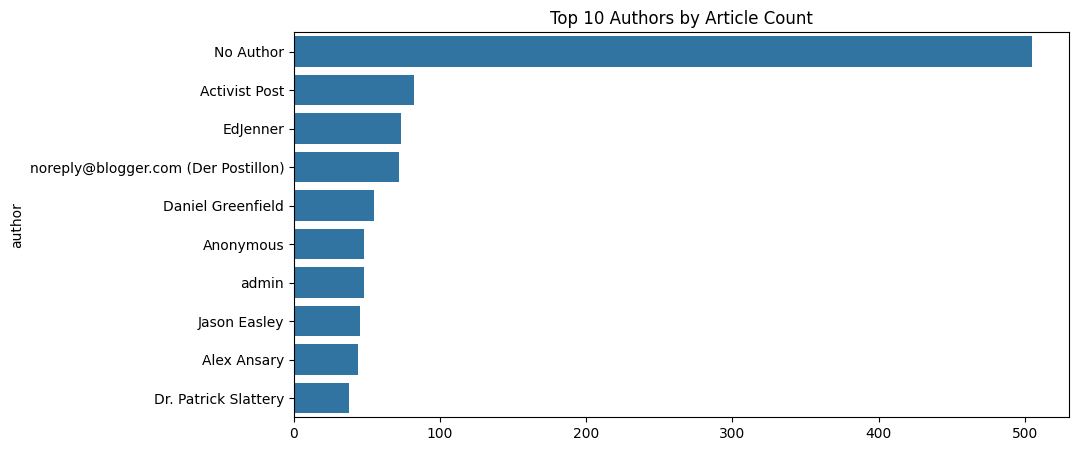

In [111]:
# 1. author
print(df['author'].nunique(), "unique authors")
top_authors = df['author'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_authors.values, y=top_authors.index)
plt.title("Top 10 Authors by Article Count")
plt.show()

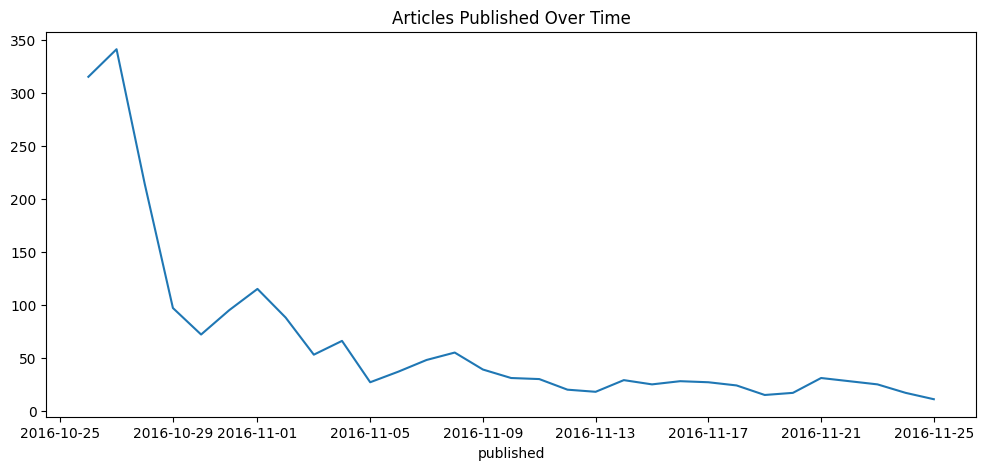

In [112]:
# 2. published (date distribution)
df['published'] = pd.to_datetime(df['published'], errors='coerce')
plt.figure(figsize=(12,5))
df['published'].dt.date.value_counts().sort_index().plot()
plt.title("Articles Published Over Time")
plt.show()

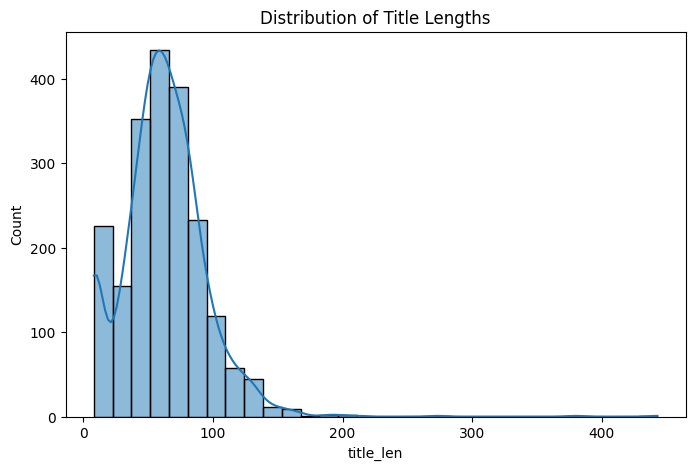

In [113]:
# 3. title (length distribution)
df['title_len'] = df['title'].astype(str).apply(len)
plt.figure(figsize=(8,5))
sns.histplot(df['title_len'], bins=30, kde=True)
plt.title("Distribution of Title Lengths")
plt.show()

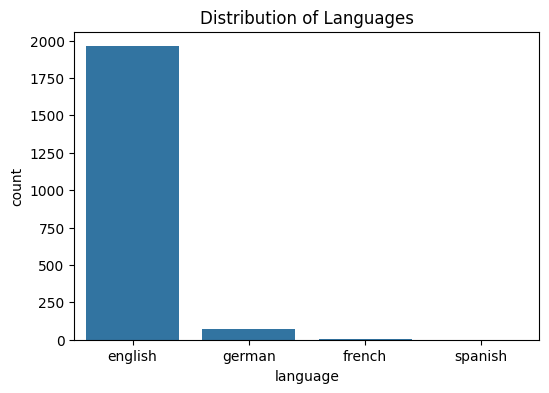

In [115]:
# 5. language

df = df[df['language'] != 'ignore']

plt.figure(figsize=(6,4))
sns.countplot(x=df['language'])
plt.title("Distribution of Languages")
plt.show()

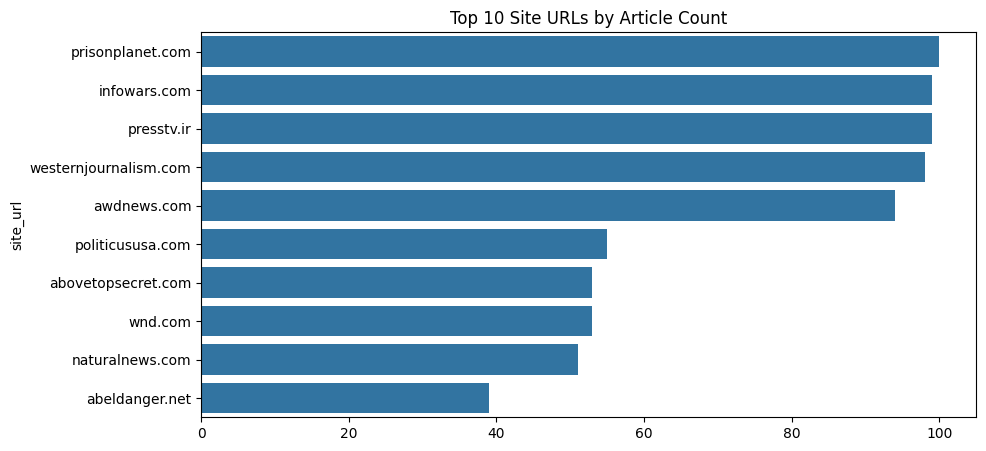

In [60]:
# 6. site_url (top 10 sites)
top_sites = df['site_url'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_sites.values, y=top_sites.index)
plt.title("Top 10 Site URLs by Article Count")
plt.show()


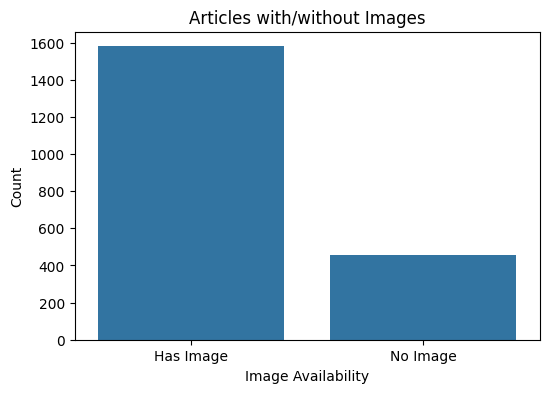

In [116]:
# 7. main_img_url (has image vs not)
# Map 0/1 to labels
df['hasImageLabel'] = df['hasImage'].map({0: 'No Image', 1: 'Has Image'})

plt.figure(figsize=(6,4))
sns.countplot(x=df['hasImageLabel'])
plt.title("Articles with/without Images")
plt.xlabel("Image Availability")
plt.ylabel("Count")
plt.show()

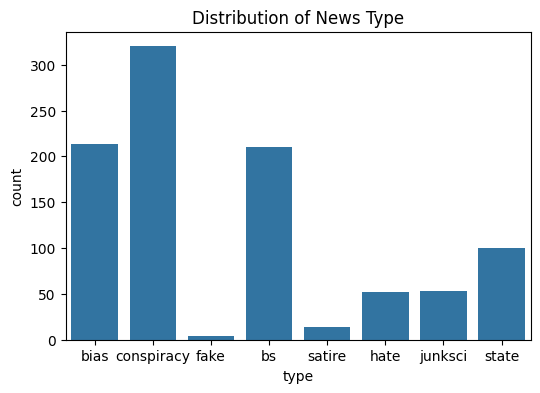

In [62]:
# 8. type
plt.figure(figsize=(6,4))
sns.countplot(x=df['type'])
plt.title("Distribution of News Type")
plt.show()

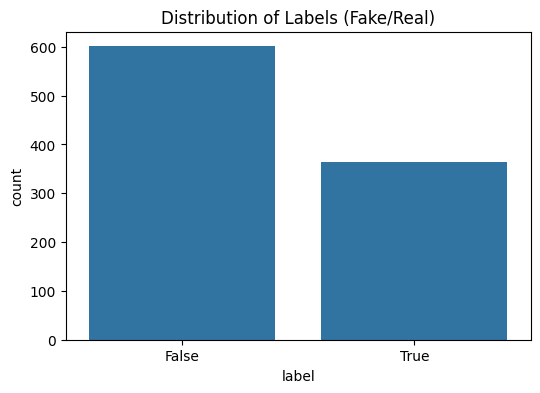

In [71]:
# 9. label
plt.figure(figsize=(6,4))
sns.countplot(x=df['label'])
plt.title("Distribution of Labels (Fake/Real)")
plt.show()

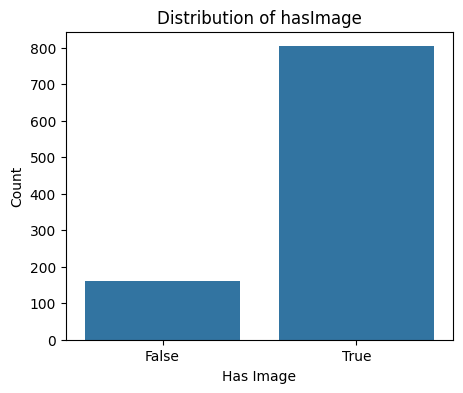

In [66]:
plt.figure(figsize=(5,4))
sns.countplot(x='hasImage', data=df)
plt.title("Distribution of hasImage")
plt.xlabel("Has Image")
plt.ylabel("Count")
plt.show()

In [ ]:
''' BIVARIATE '''

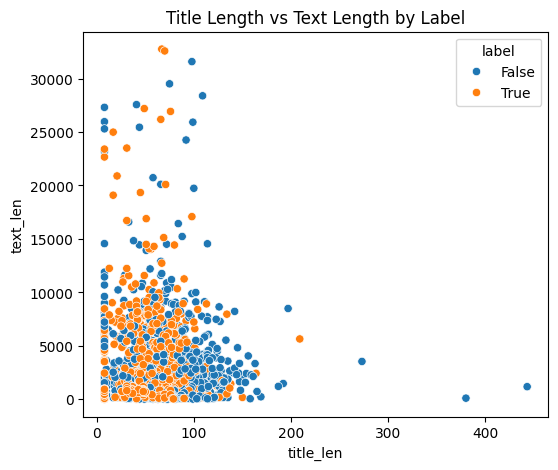

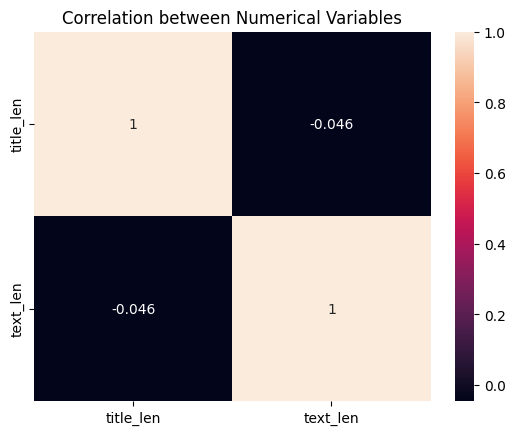

In [117]:
# 1. Numerical vs Numerical (Correlation)
plt.figure(figsize=(6,5))
sns.scatterplot(x='title_len', y='text_len', hue='label', data=df)
plt.title("Title Length vs Text Length by Label")
plt.show()

# Correlation matrix for numerical variables
num_cols = ['title_len', 'text_len']
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True)
plt.title("Correlation between Numerical Variables")
plt.show()

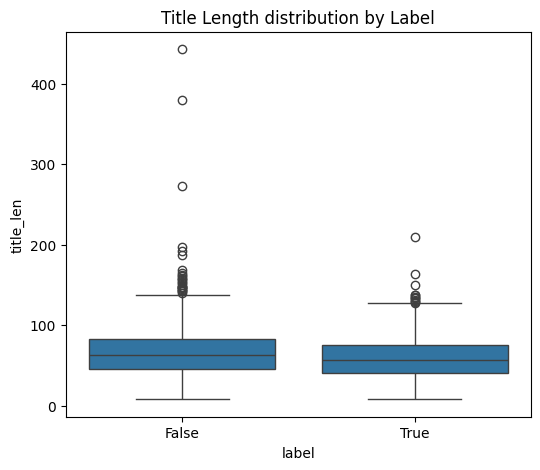

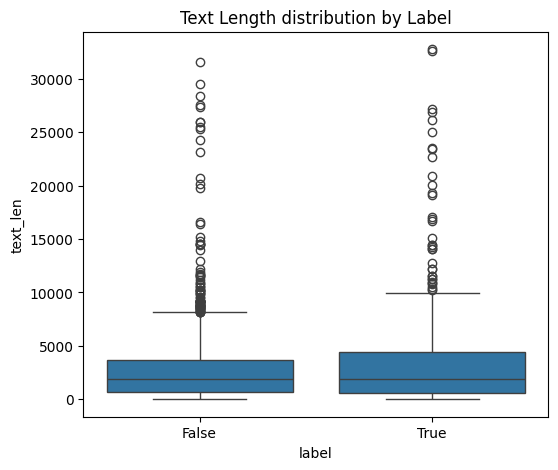

In [118]:
# 2. Categorical vs Numerical

# label vs title_len
plt.figure(figsize=(6,5))
sns.boxplot(x='label', y='title_len', data=df)
plt.title("Title Length distribution by Label")
plt.show()

# label vs text_len
plt.figure(figsize=(6,5))
sns.boxplot(x='label', y='text_len', data=df)
plt.title("Text Length distribution by Label")
plt.show()

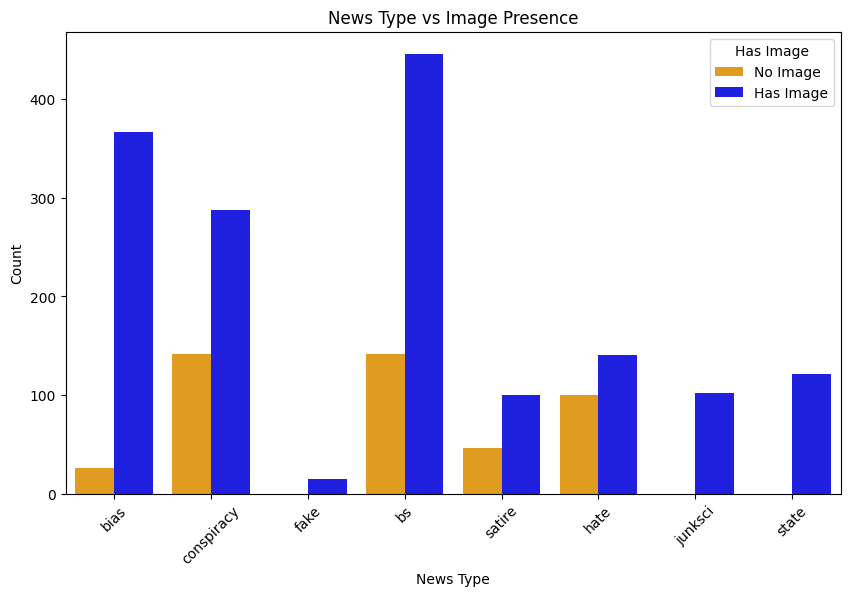

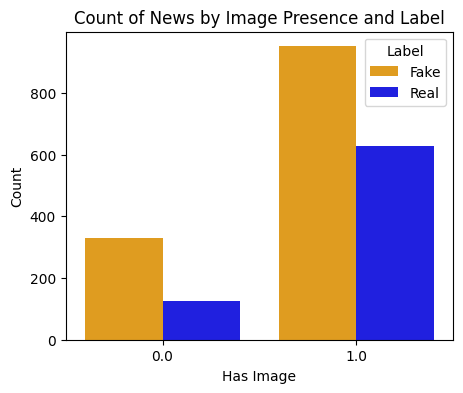

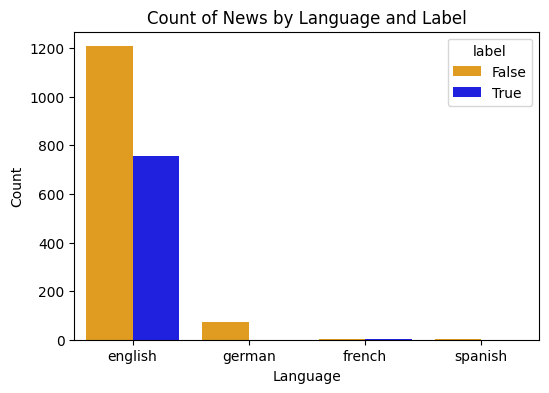

In [119]:
#Categorical vs Categorical
# newstype vs hasimage
plt.figure(figsize=(10,6))
sns.countplot(x='type', hue='hasImage', data=df, palette=['orange','blue'])
plt.title("News Type vs Image Presence")
plt.xlabel("News Type")
plt.ylabel("Count")
plt.legend(title='Has Image', labels=['No Image', 'Has Image'])
plt.xticks(rotation=45)
plt.show()

# hasImage vs label
plt.figure(figsize=(5,4))
sns.countplot(x='hasImage', hue='label', data=df, palette=['orange','blue'])
plt.title("Count of News by Image Presence and Label")
plt.xlabel("Has Image")
plt.ylabel("Count")
plt.legend(title='Label', labels=['Fake', 'Real'])
plt.show()

#  language vs label
plt.figure(figsize=(6,4))
sns.countplot(x='language', hue='label', data=df, palette=['orange','blue'])
plt.title("Count of News by Language and Label")
plt.xlabel("Language")
plt.ylabel("Count")
plt.show()